# Invesetors Punish Equifax for Massive Data Breach
# Final version link (Lab 3): https://goo.gl/QDtm5W
# MSIS 2629 - Data Visualization
# Submitted by: Yuhao Wang

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fuzzywuzzy import fuzz
from urllib2 import urlopen, URLError
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("test.csv")

The Entity's name with '&' will have some negative influences on the web scraping. I decide to deal with it firstly.

In [6]:
df['Entity'][df.Entity == 'AT&T'] = 'ATT'
df['Entity'][df.Entity == 'D&B, Altegrity'] = 'Altegrity'

In [7]:
helper = df.Entity
helper = list(helper)

Web Scraping

In [8]:
res = []
for i in helper:
    url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=' + '%20'.join(i.split(' ')) + '&region=1&lang=en'
    #print url
    resp = urlopen(url)
    s = resp.read()
    res.append(s)

Change string to json, and skip the useless rows(private company or non-profit organization)

In [9]:
import json
for i in range(0,len(res)):
    j = json.loads(res[i])
    if j['ResultSet']['Result'] == []:
        res[i] = ''
res[:10]  

['{"ResultSet":{"Query":"AOL","Result":[{"symbol":"AOL-U.TI","name":"TIME WARNER","exch":"TLO","type":"S","exchDisp":"TLX Exchange","typeDisp":"Equity"},{"symbol":"AOLS","name":"Aeolus Pharmaceuticals, Inc.","exch":"PNK","type":"S","exchDisp":"OTC Markets","typeDisp":"Equity"},{"symbol":"AOL1.F","name":"Time Warner Inc.","exch":"FRA","type":"S","exchDisp":"Frankfurt","typeDisp":"Equity"},{"symbol":"AOLAX","name":"Forward Income & Growth Allocat","exch":"NAS","type":"M","exchDisp":"NASDAQ","typeDisp":"Fund"},{"symbol":"AOLCX","name":"Aston/Optimum Large Cap Opportunity N","exch":"NAS","type":"M","exchDisp":"NASDAQ","typeDisp":"Fund"},{"symbol":"AOL.SI","name":"Biosensors.ES.1502future","exch":"SES","type":"F","exchDisp":"Singapore","typeDisp":"Futures"},{"symbol":"AOL1.BE","name":"TIME WARNER NEW  DL-,01","exch":"BER","type":"S","exchDisp":"Berlin","typeDisp":"Equity"},{"symbol":"AOL1.DE","name":"TIME WARNER NEW  DL-,01","exch":"FRA","type":"S","exchDisp":"Frankfurt","typeDisp":"Equity"

Further check, use fuzzwuzzy to regonize match Entity's name and stock symbol

In [10]:
df['Raw_Symbol'] = res
df = df[df.Raw_Symbol != '']
df = df.reset_index()
df = df.ix[:,1:8]

In [11]:
for i in range(0, len(df.Raw_Symbol)):
    if fuzz.partial_ratio(df.Entity[i], df.Raw_Symbol[i][28:]) <= 0:
        df.Raw_Symbol[i] = ''
df = df[df.Raw_Symbol != '']
df = df.reset_index()
df = df.ix[:,1:8]

In [12]:
for i in range(0, len(df.Raw_Symbol)):
    j = json.loads(df.Raw_Symbol[i])
    helper = j['ResultSet']['Result']
    for h in range(0, len(helper)):
        if fuzz.partial_ratio(df.Entity[i], helper[h]):
            df.Raw_Symbol[i] = helper[0]['symbol']

Double check

In [13]:
df = df[df.Entity != 'University of Miami'][df.Entity != 'LinkedIn'][df.Entity != 'Stratfor']
df = df.reset_index()
df = df.ix[:,1:8]
df

,Entity,YEAR,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY,Raw_Symbol
0,Automatic Data Processing,2005,125000,financial,poor security,SSN/Personal details,ADP
1,Citigroup,2005,3900000,financial,lost / stolen device,Credit card information,CIT-U.TI
2,Hewlett Packard,2006,200000,"tech, retail",lost / stolen device,SSN/Personal details,HPQ
3,Gap Inc,2007,800000,retail,lost / stolen device,SSN/Personal details,GPS
4,TD Ameritrade,2007,6300000,financial,hacked,Just email address/Online information,AMTD
5,Fidelity National Information Services,2007,8500000,financial,inside job,Credit card information,FIS
6,Dai Nippon Printing,2007,8637405,retail,inside job,Just email address/Online information,DNPCF
7,ATT,2008,113000,telecoms,lost / stolen device,Just email address/Online information,T
8,Starbucks,2008,97000,retail,lost / stolen device,SSN/Personal details,SBUX
9,Network Solutions,2009,573000,tech,hacked,Credit card information,LYNS


I choose Equifax as stduy case to refute the claim by collecting its historical stock prices from Google Fiance.

In [20]:
import pandas_datareader.data as web
import datetime
import fix_yahoo_finance as yf
import warnings
warnings.filterwarnings('ignore')

df1 = web.get_data_google('EFX',start="2016-10-01", end="2017-10-06")

dates =[]
for x in range(len(df1)):
    newdate = str(df1.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
df1['dates'] = dates

# Create a Series called nf
nf = df1.Close

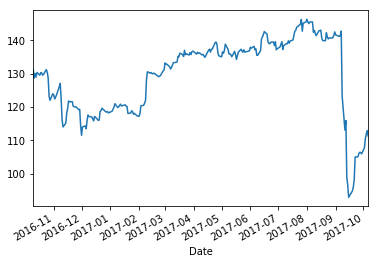

In [21]:
nf.plot()

In [22]:
df1.to_csv('EFX_stock.csv')

Try to get a linear regression model

In [23]:
import statsmodels.formula.api as smf
df1.dates = (df1.index -  df1.index[0]).days.astype("int64").values.reshape(-1, 1)
smf.ols( 'Close ~ dates', data=df1).fit().params

Intercept    123.873236
dates          0.030028
dtype: float64

In [24]:
model = smf.ols( 'Close ~ dates', data=df1).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     19.94
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           1.21e-05
Time:                        21:57:11   Log-Likelihood:                -962.28
No. Observations:                 251   AIC:                             1929.
Df Residuals:                     249   BIC:                             1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    123.8732      1.410     87.872      0.000     121.097     126.650
dates          0.0300      0.007      4.466      0.000       0.017       0.043
==============================================================================
Omnibus:                       83.898   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.983
Skew:                          -1.645   Prob(JB):                     1.12e-40
Kurtosis:                       5.602   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sometimes pandas_datareader would throw some errors, we can use another package to deal with this situation

In [ ]:
import fix_yahoo_finance as yf
data = yf.download("EFX", start="2017-01-01", end="2017-10-02")
stock = data.Close

In [ ]:
stock.plot()